In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
turmasSolino = []
nomeTurmasSolino = ['ITP Solino 2016.1','PTP 1 Solino 2016.2', 'ITP Solino 2017.2', 'PTP 2 Solino 2016.2', 'PTP Solino 2017.2']
turmasBeserra = []
nomeTurmasBeserra = ['ITP Beserra 2017.1','PTP Beserra 2017.1','ITP Beserra 2017.2','PTP Beserra 2017.2']

for i in range(1,3):
    turmasSolino.append(pd.read_csv( "Data/Solino/itp_Solino" + str(i) + ".csv", sep = ";" ))
    turmasSolino.append(pd.read_csv( "Data/Solino/ptp_Solino" + str(i) + ".csv", sep = ";" ))
    turmasBeserra.append(pd.read_csv( "Data/Beserra/itp_Beserra" + str(i) + ".csv", sep = ";" ))
    turmasBeserra.append(pd.read_csv( "Data/Beserra/ptp_Beserra" + str(i) + ".csv", sep = ";" ))

turmasSolino.append(pd.read_csv( "Data/Solino/ptp_Solino3.csv", sep = ";" ))    

In [3]:
for i in range(0,4):
    turmasSolino[i] = turmasSolino[i].drop("Unnamed: 0", axis=1)
    turmasBeserra[i] = turmasBeserra[i].drop("Unnamed: 0", axis=1)
turmasSolino[4] = turmasSolino[4].drop("Unnamed: 0", axis=1)

In [4]:
def simplifica_dataset ( data_set ):
    data_set = data_set[data_set["descricao"] != "EXCLUIDA"]
    data_set = data_set[data_set["descricao"] != "CANCELADO"]
    data_set = data_set[data_set["descricao"] != "TRANCADO"]
    data_set = data_set[data_set["descricao"] != "DESISTENCIA"]
    data_set = data_set[data_set["descricao"] != "INDEFERIDO"]
    data_set = data_set[["discente","descricao","unidade", "nota", "media_final"]]
    data_set = data_set.dropna()
    return data_set

In [5]:
def aprovados(data_set):
    data_set = data_set[data_set["unidade"] == 1.0]
    data_set = data_set.drop("unidade", axis=1)
    data_set = data_set.drop("nota", axis=1)
    data_set = data_set[data_set["media_final"] >= 5.0]
    data_set = data_set.reset_index()
    data_set = data_set.drop("index", axis=1)
    return data_set

In [6]:
def unidades(data_set):
    unidades = []
    unidades.append(data_set[data_set["unidade"] == 1.0])
    unidades.append(data_set[data_set["unidade"] == 2.0])
    unidades.append(data_set[data_set["unidade"] == 3.0])   
    for i in range(len(unidades)):
        unidades[i] = unidades[i].drop("unidade", axis=1)
        unidades[i] = unidades[i].drop("media_final", axis=1)
        unidades[i] = unidades[i].reset_index()
        unidades[i] = unidades[i].drop("index", axis=1)
        
    unidades.append(data_set[data_set["unidade"] == 3.0])
    unidades[3] = unidades[3].drop("unidade", axis=1)
    unidades[3] = unidades[3].drop("nota", axis=1)
    unidades[3] = unidades[3].reset_index()
    unidades[3] = unidades[3].drop("index", axis=1)
    return unidades

In [7]:
for i in range(0,4):
    turmasSolino[i] = simplifica_dataset(turmasSolino[i])
    turmasBeserra[i] = simplifica_dataset(turmasBeserra[i])
turmasSolino[4] = simplifica_dataset(turmasSolino[4])

In [8]:
unidadesSolino = []
unidadesBeserra = []
for i in range(0,4):
    unidadesSolino.append(unidades(turmasSolino[i]))
    unidadesBeserra.append(unidades(turmasBeserra[i]))
unidadesSolino.append(unidades(turmasSolino[4]))

In [9]:
def saveBoxPlot(turma,  unidades):
    medias = []
    fig, axs = plt.subplots(2, 2)
    fig.suptitle(turma)
    fig.set_dpi(500)
    axs[0, 0].set_title('Unidade 1')
    axs[0, 0].boxplot(unidades[0]['nota'])
    medias.append(unidades[0]['nota'].mean())
    
    axs[0, 1].set_title('Unidade 2')
    axs[0, 1].boxplot(unidades[1]['nota'])
    medias.append(unidades[1]['nota'].mean())
    
    axs[1, 0].set_title('Unidade 3')
    axs[1, 0].boxplot(unidades[2]['nota'])
    medias.append(unidades[2]['nota'].mean())
    
    axs[1, 1].set_title('Media Final')
    axs[1, 1].boxplot(unidades[3]['media_final'])
    medias.append(unidades[3]['media_final'].mean())
    
    fig.subplots_adjust(hspace=0.4)
    
    fig.savefig('./Img/' + turma + '.png')
    return medias

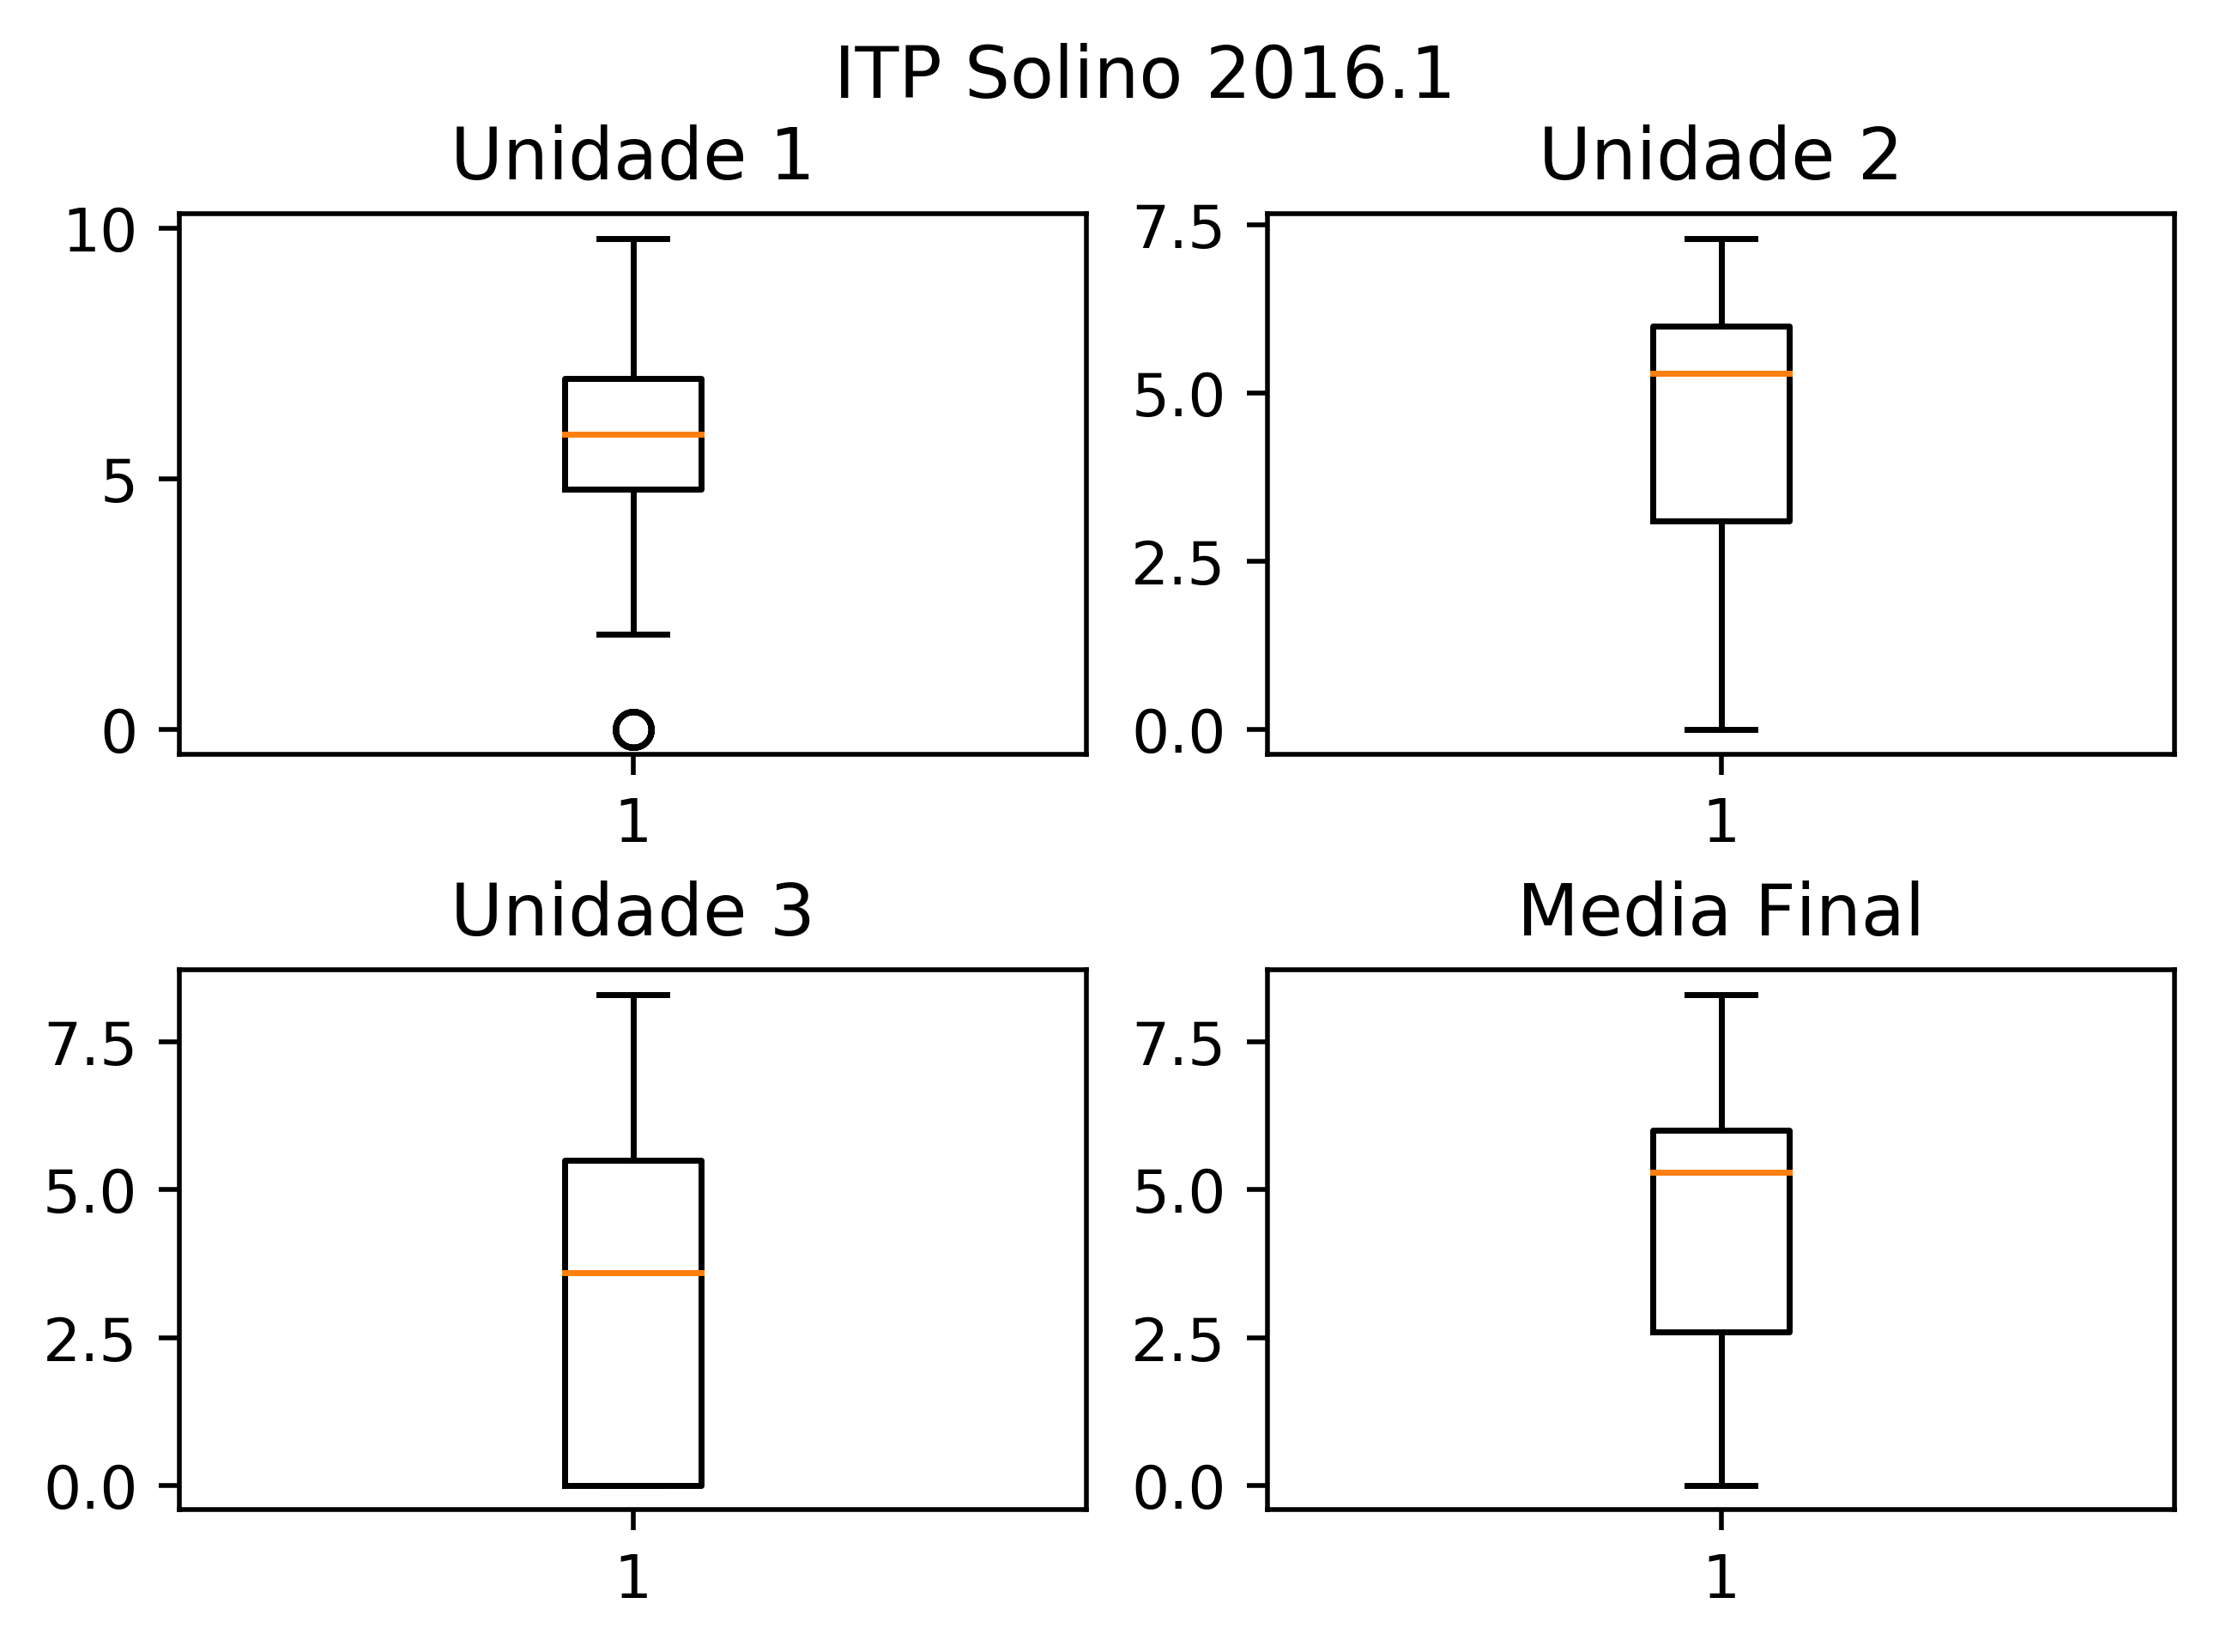

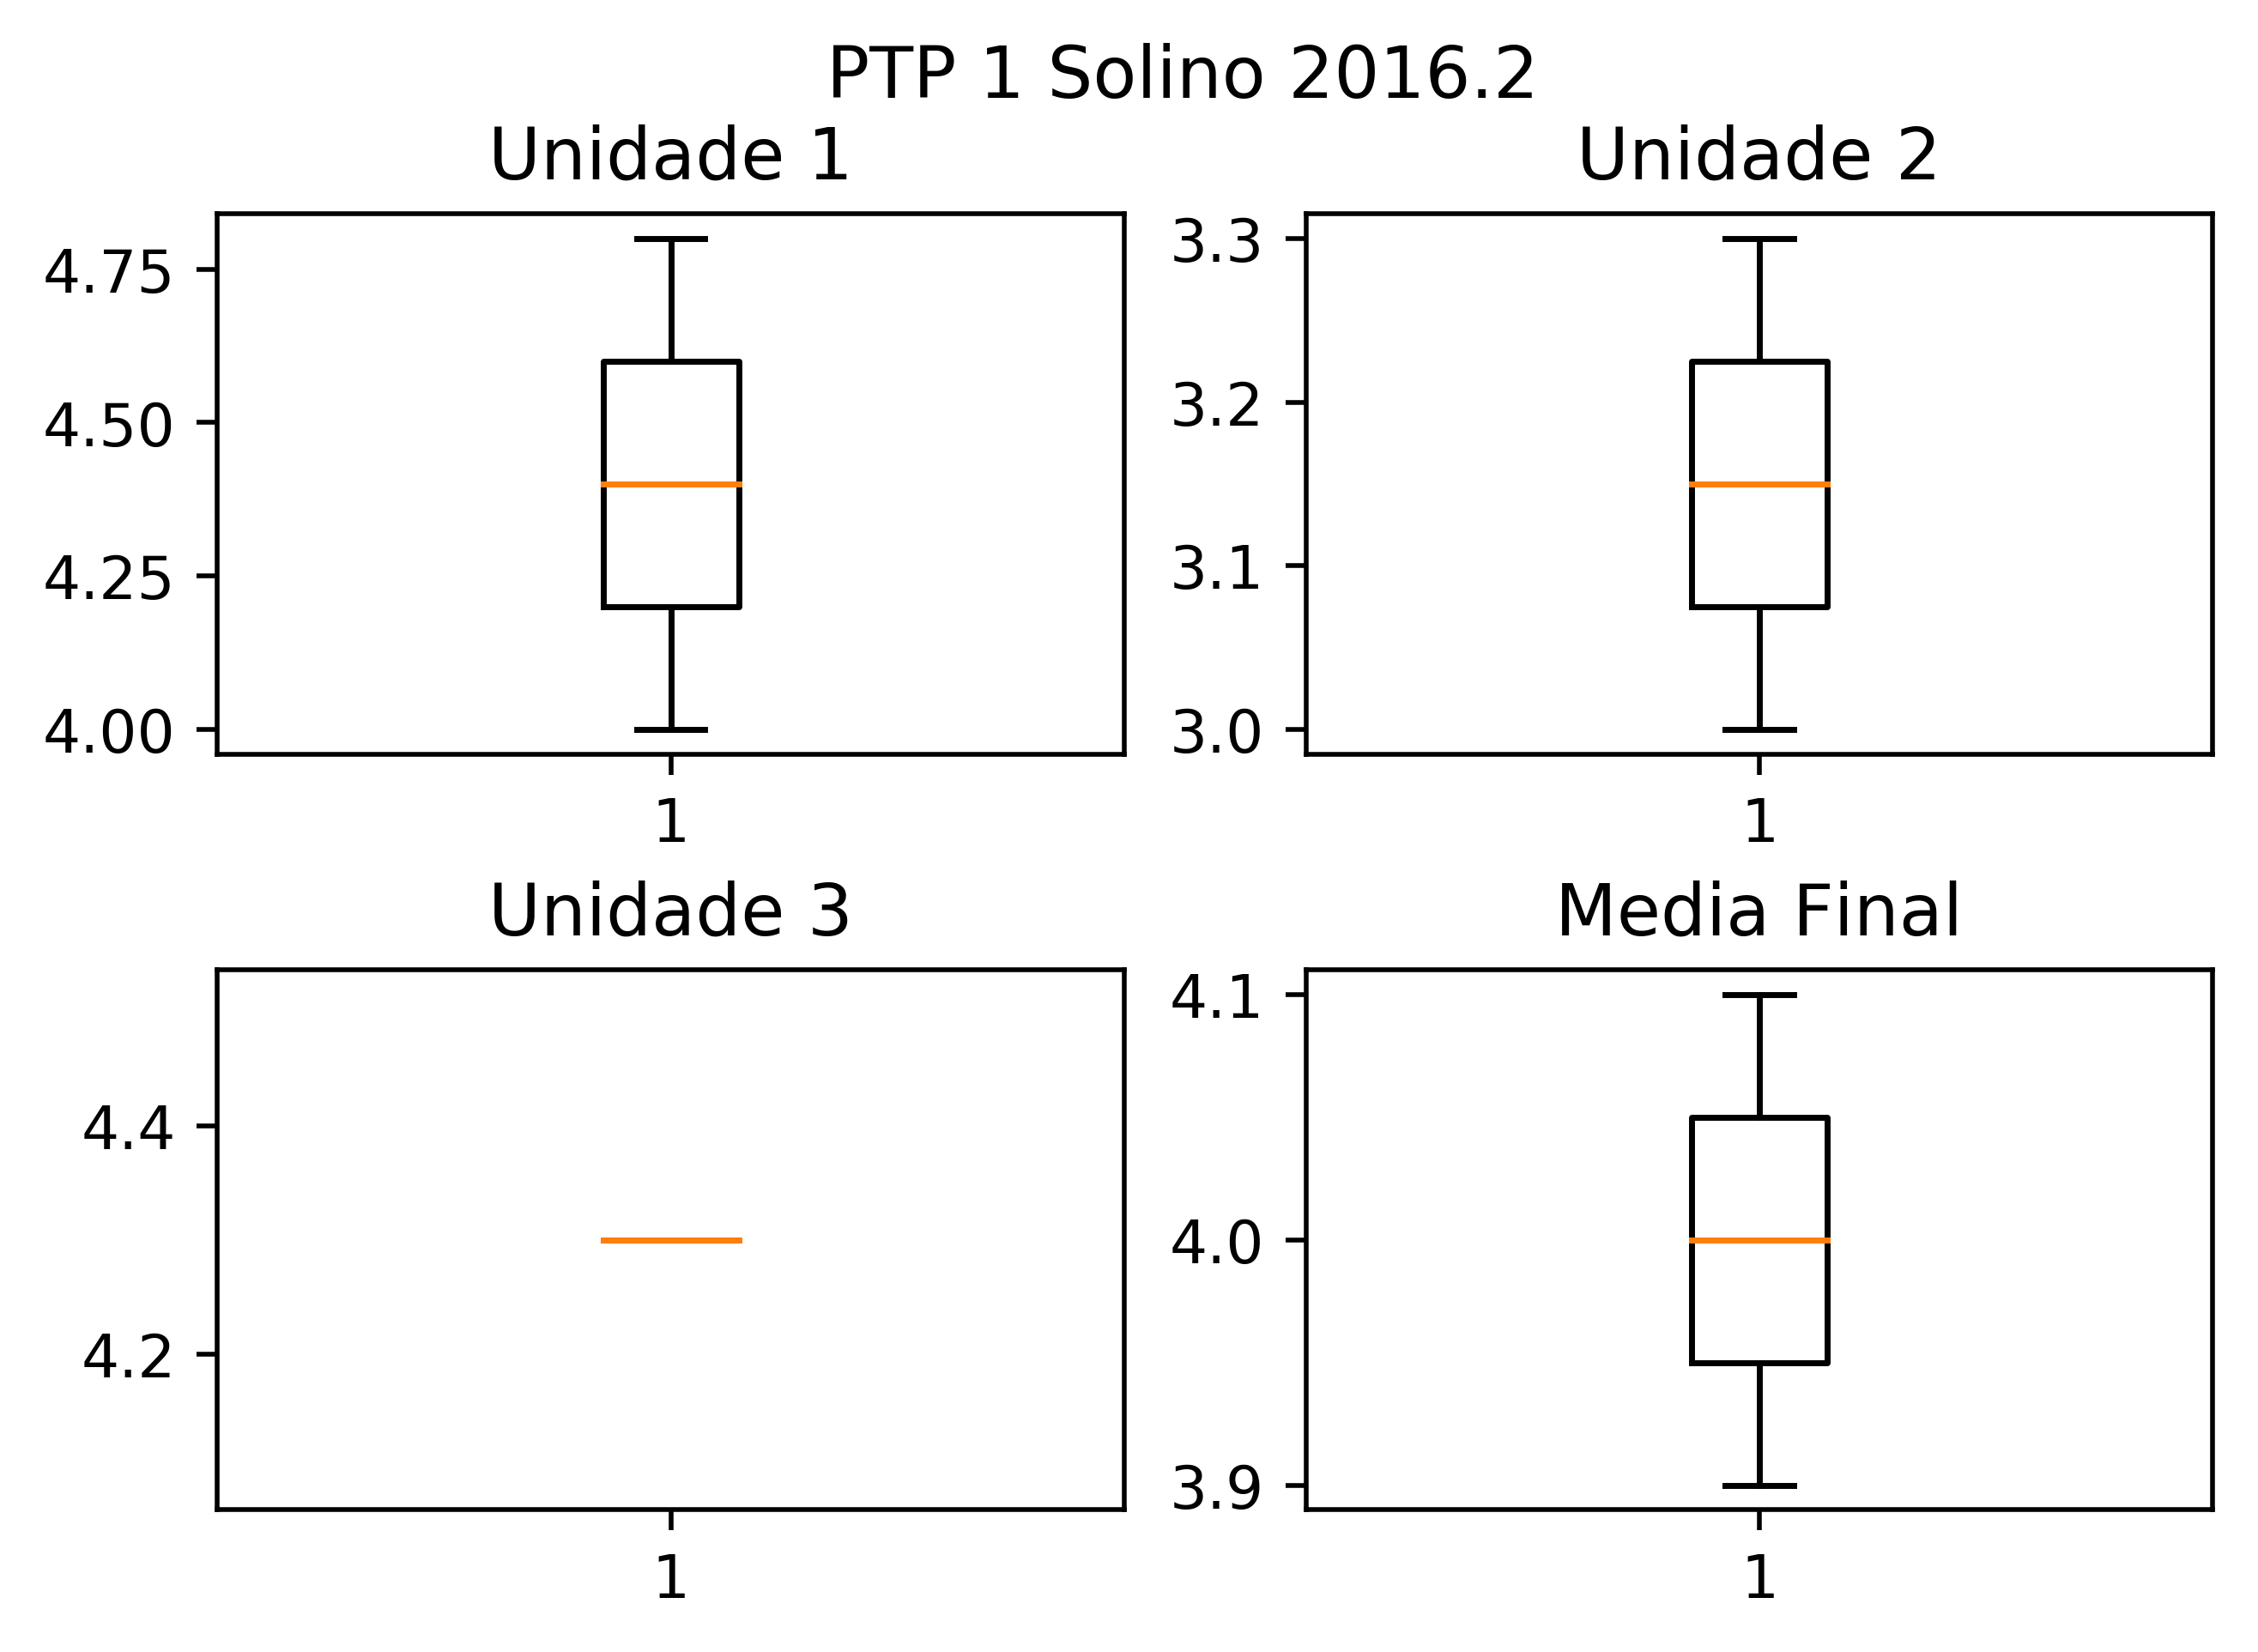

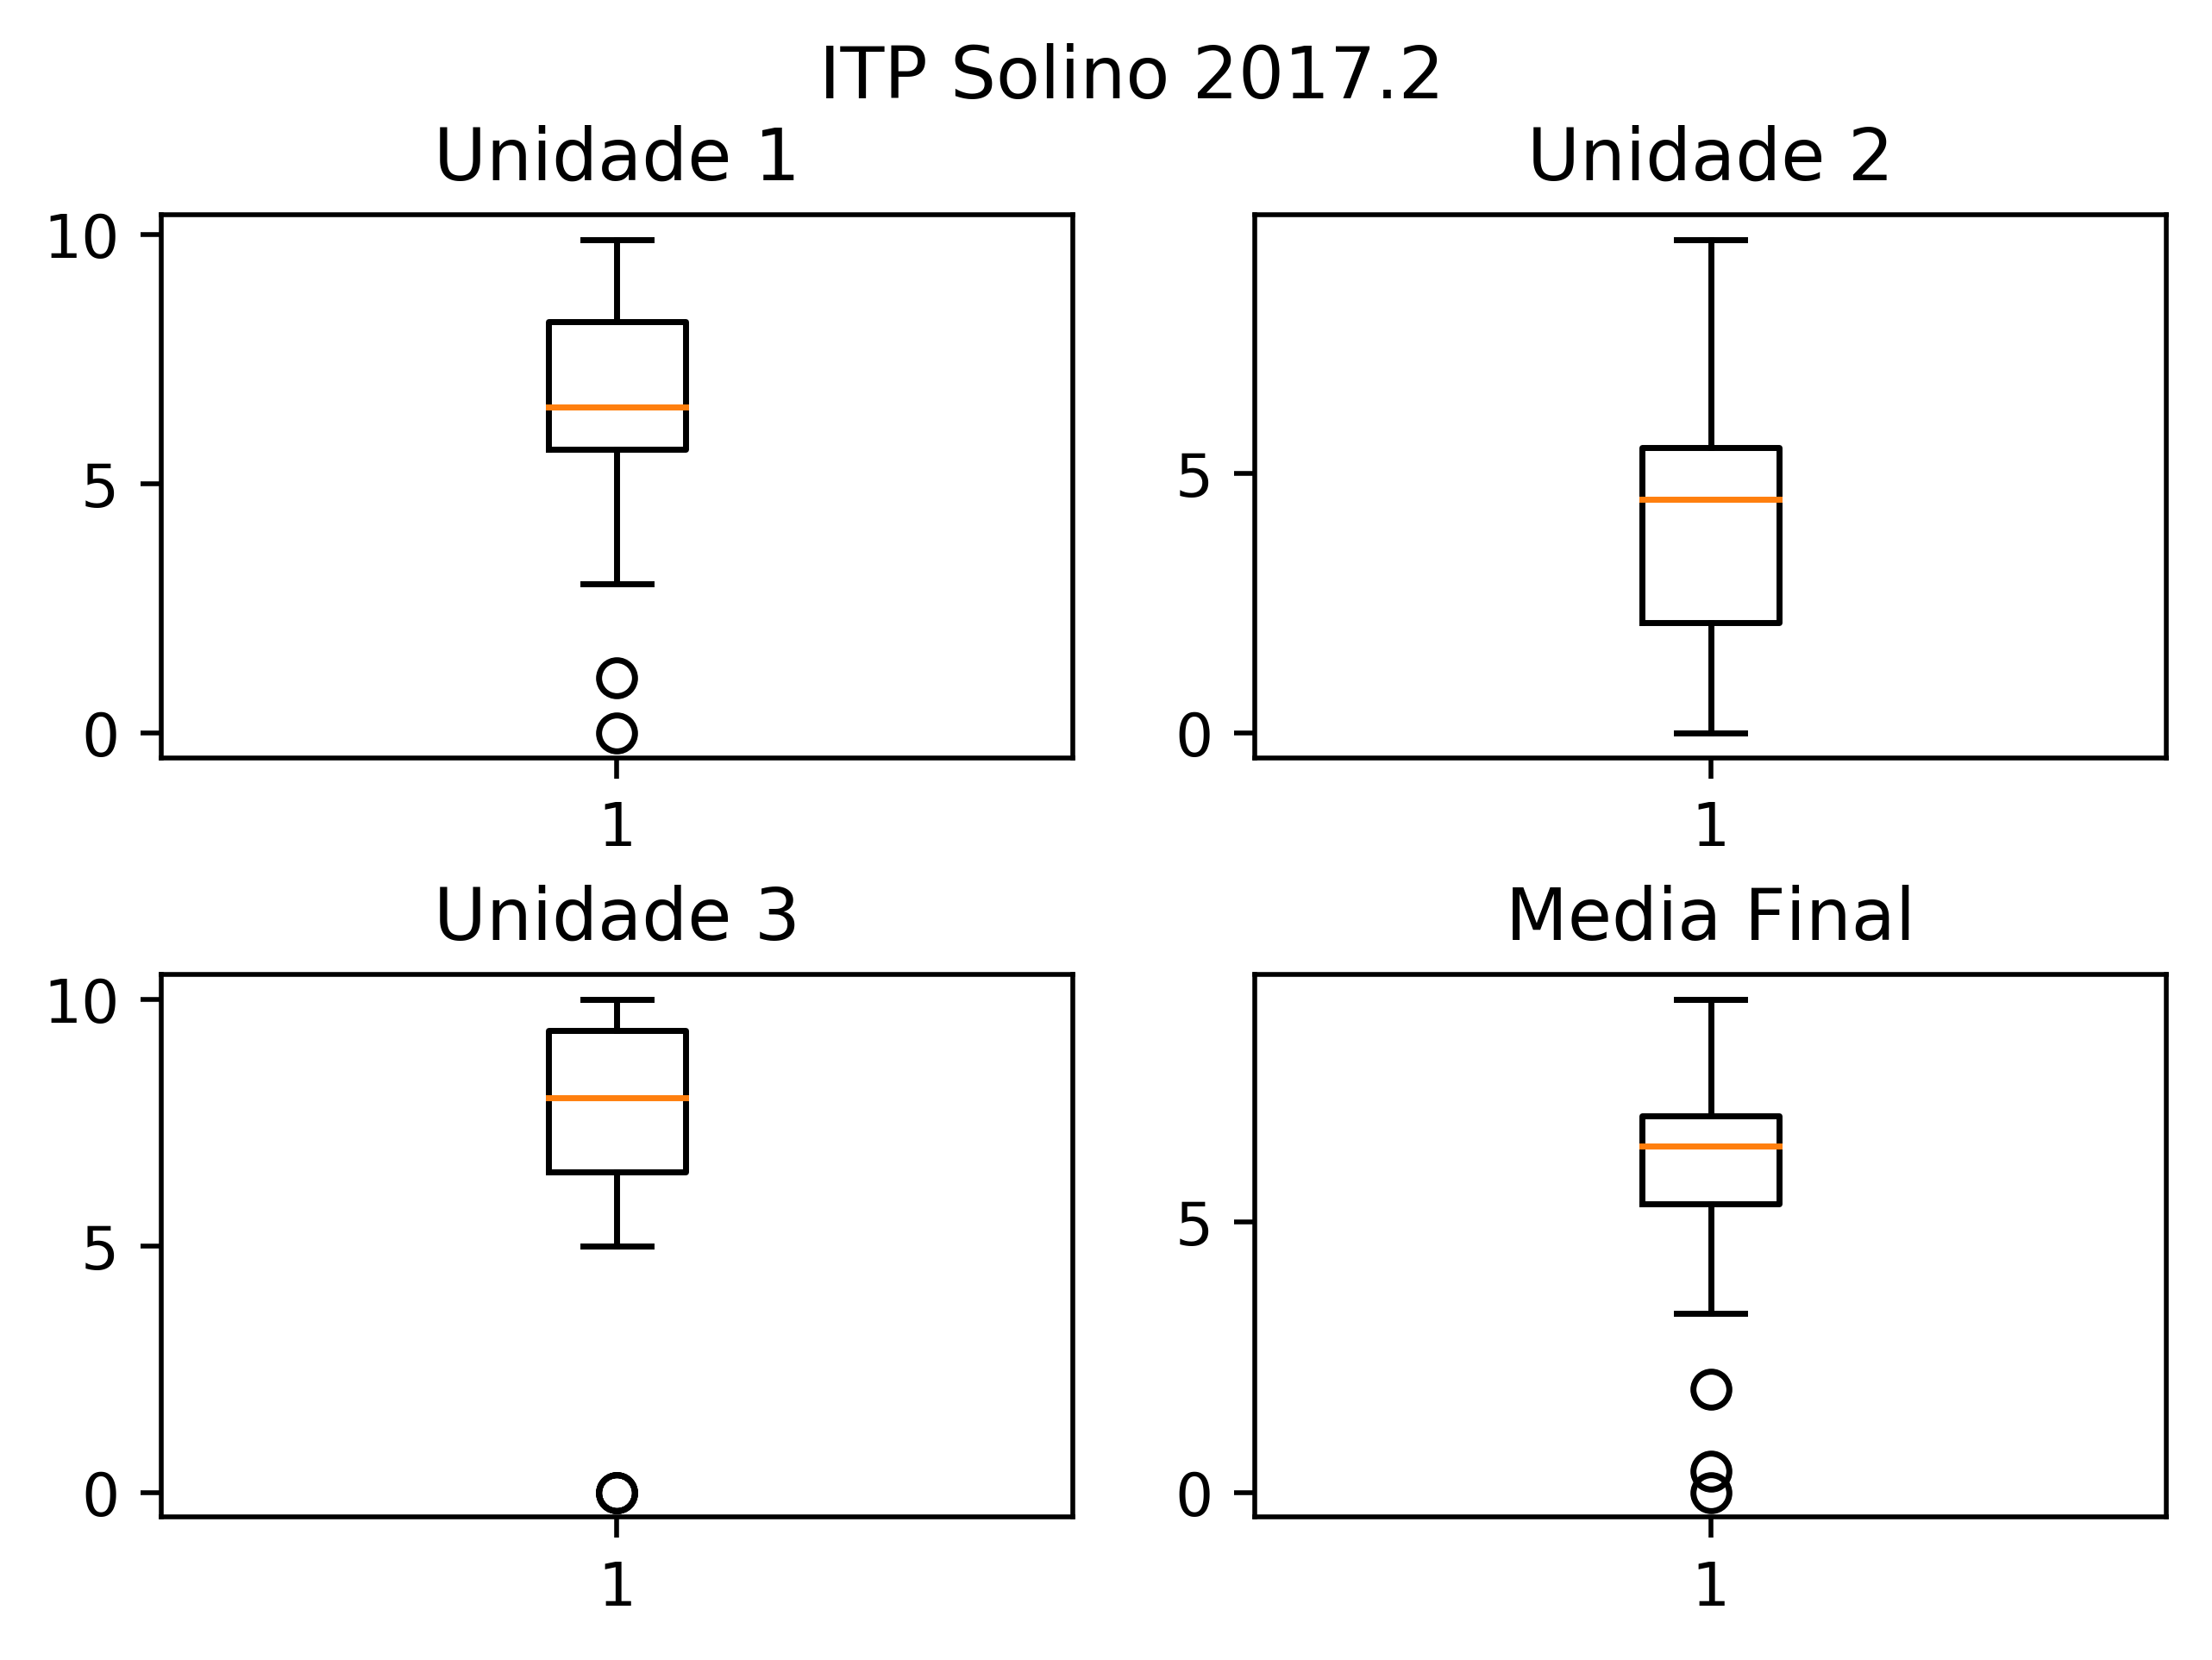

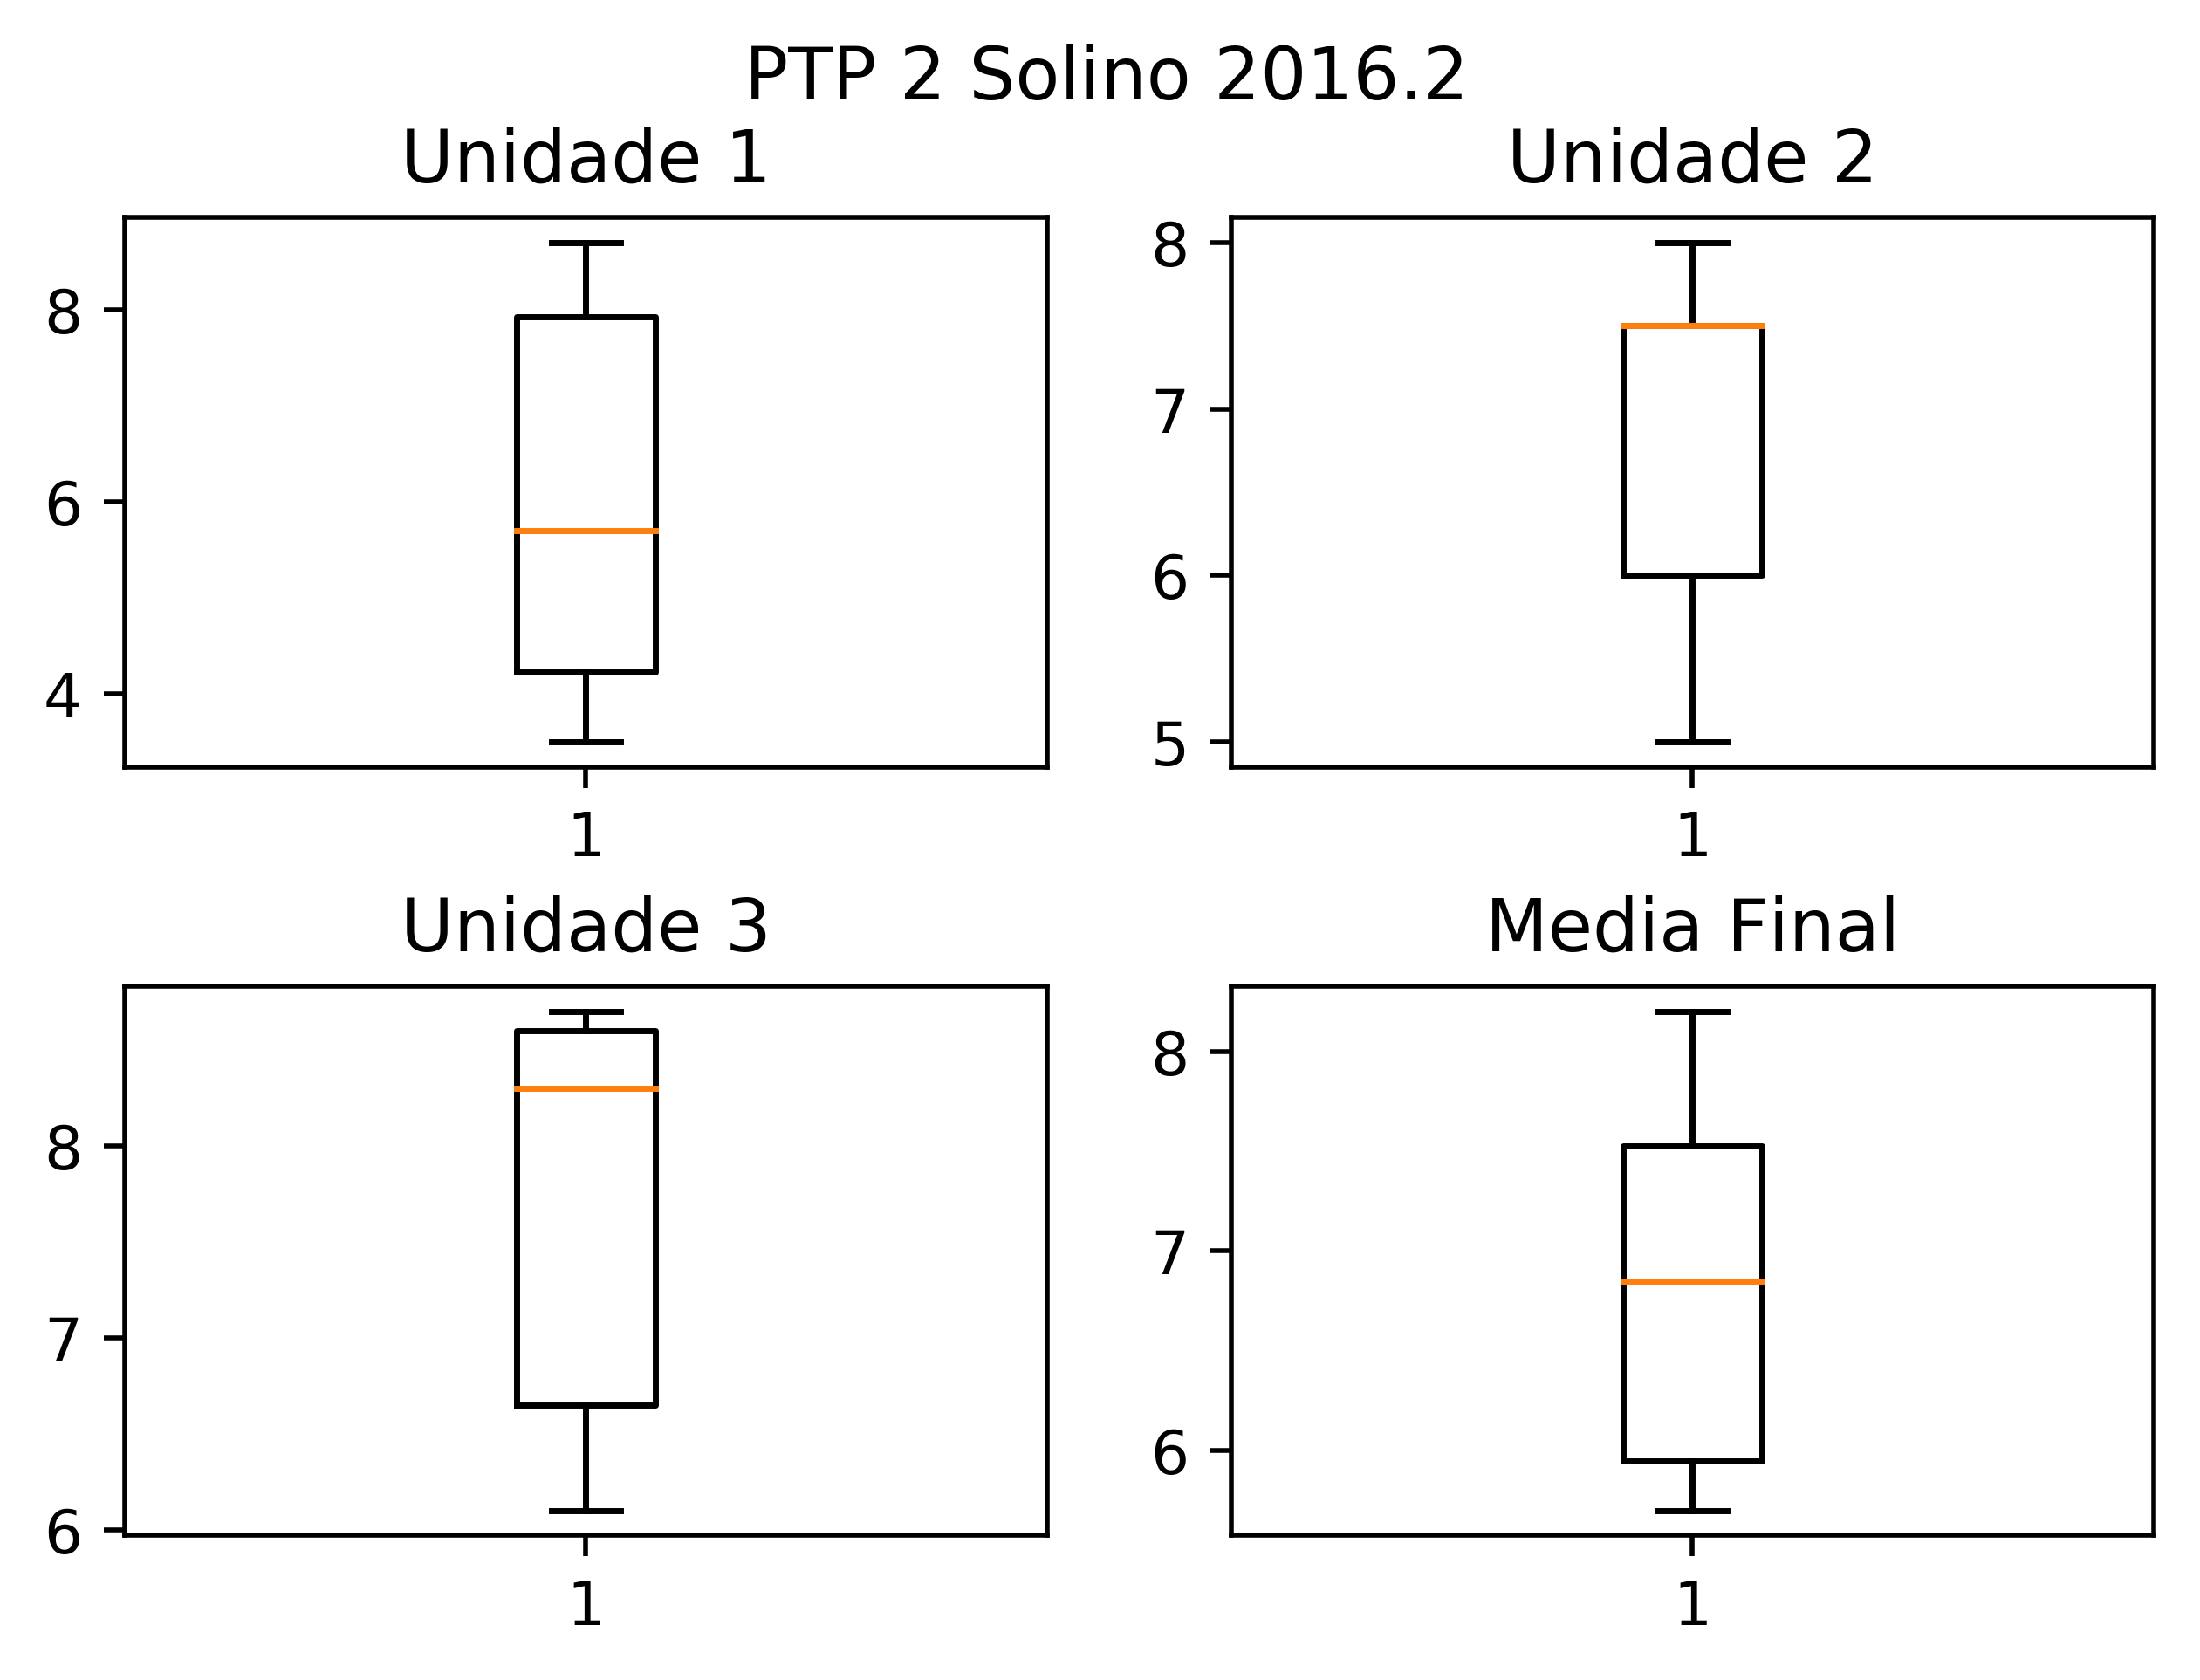

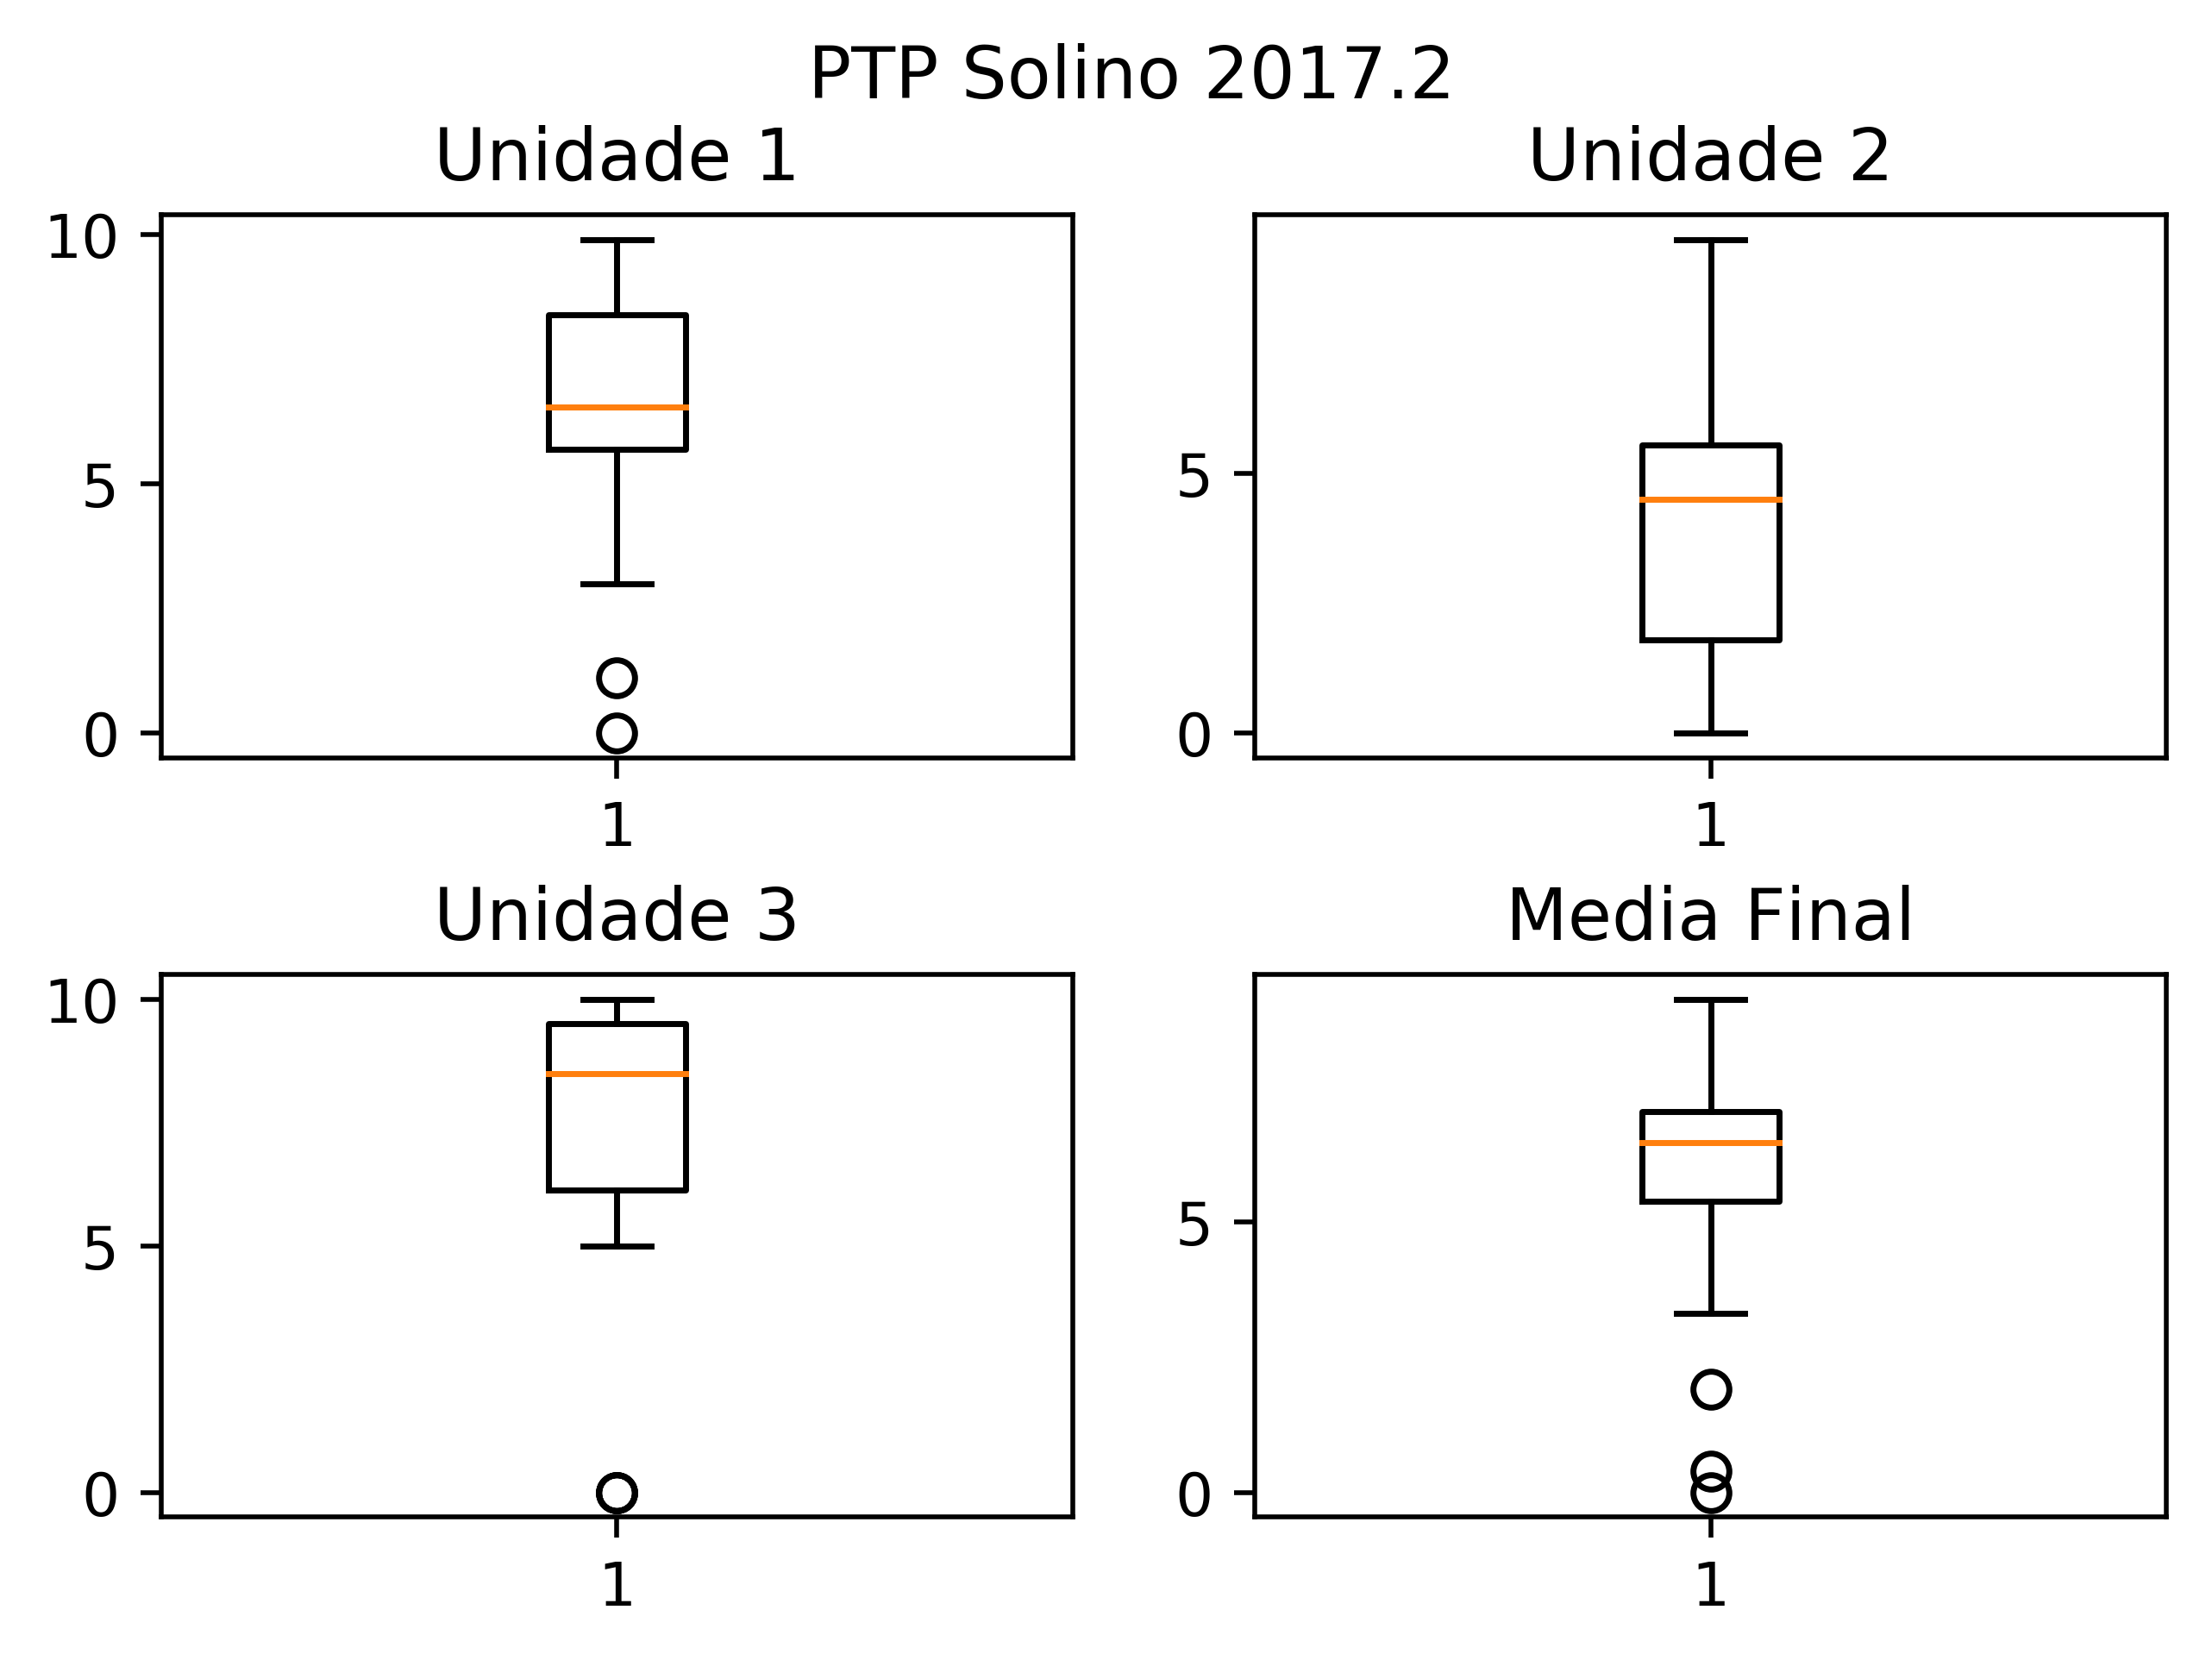

In [10]:
mediasSolino = []
for i in range(len(nomeTurmasSolino)):
    mediasSolino.append(saveBoxPlot(nomeTurmasSolino[i], unidadesSolino[i]))

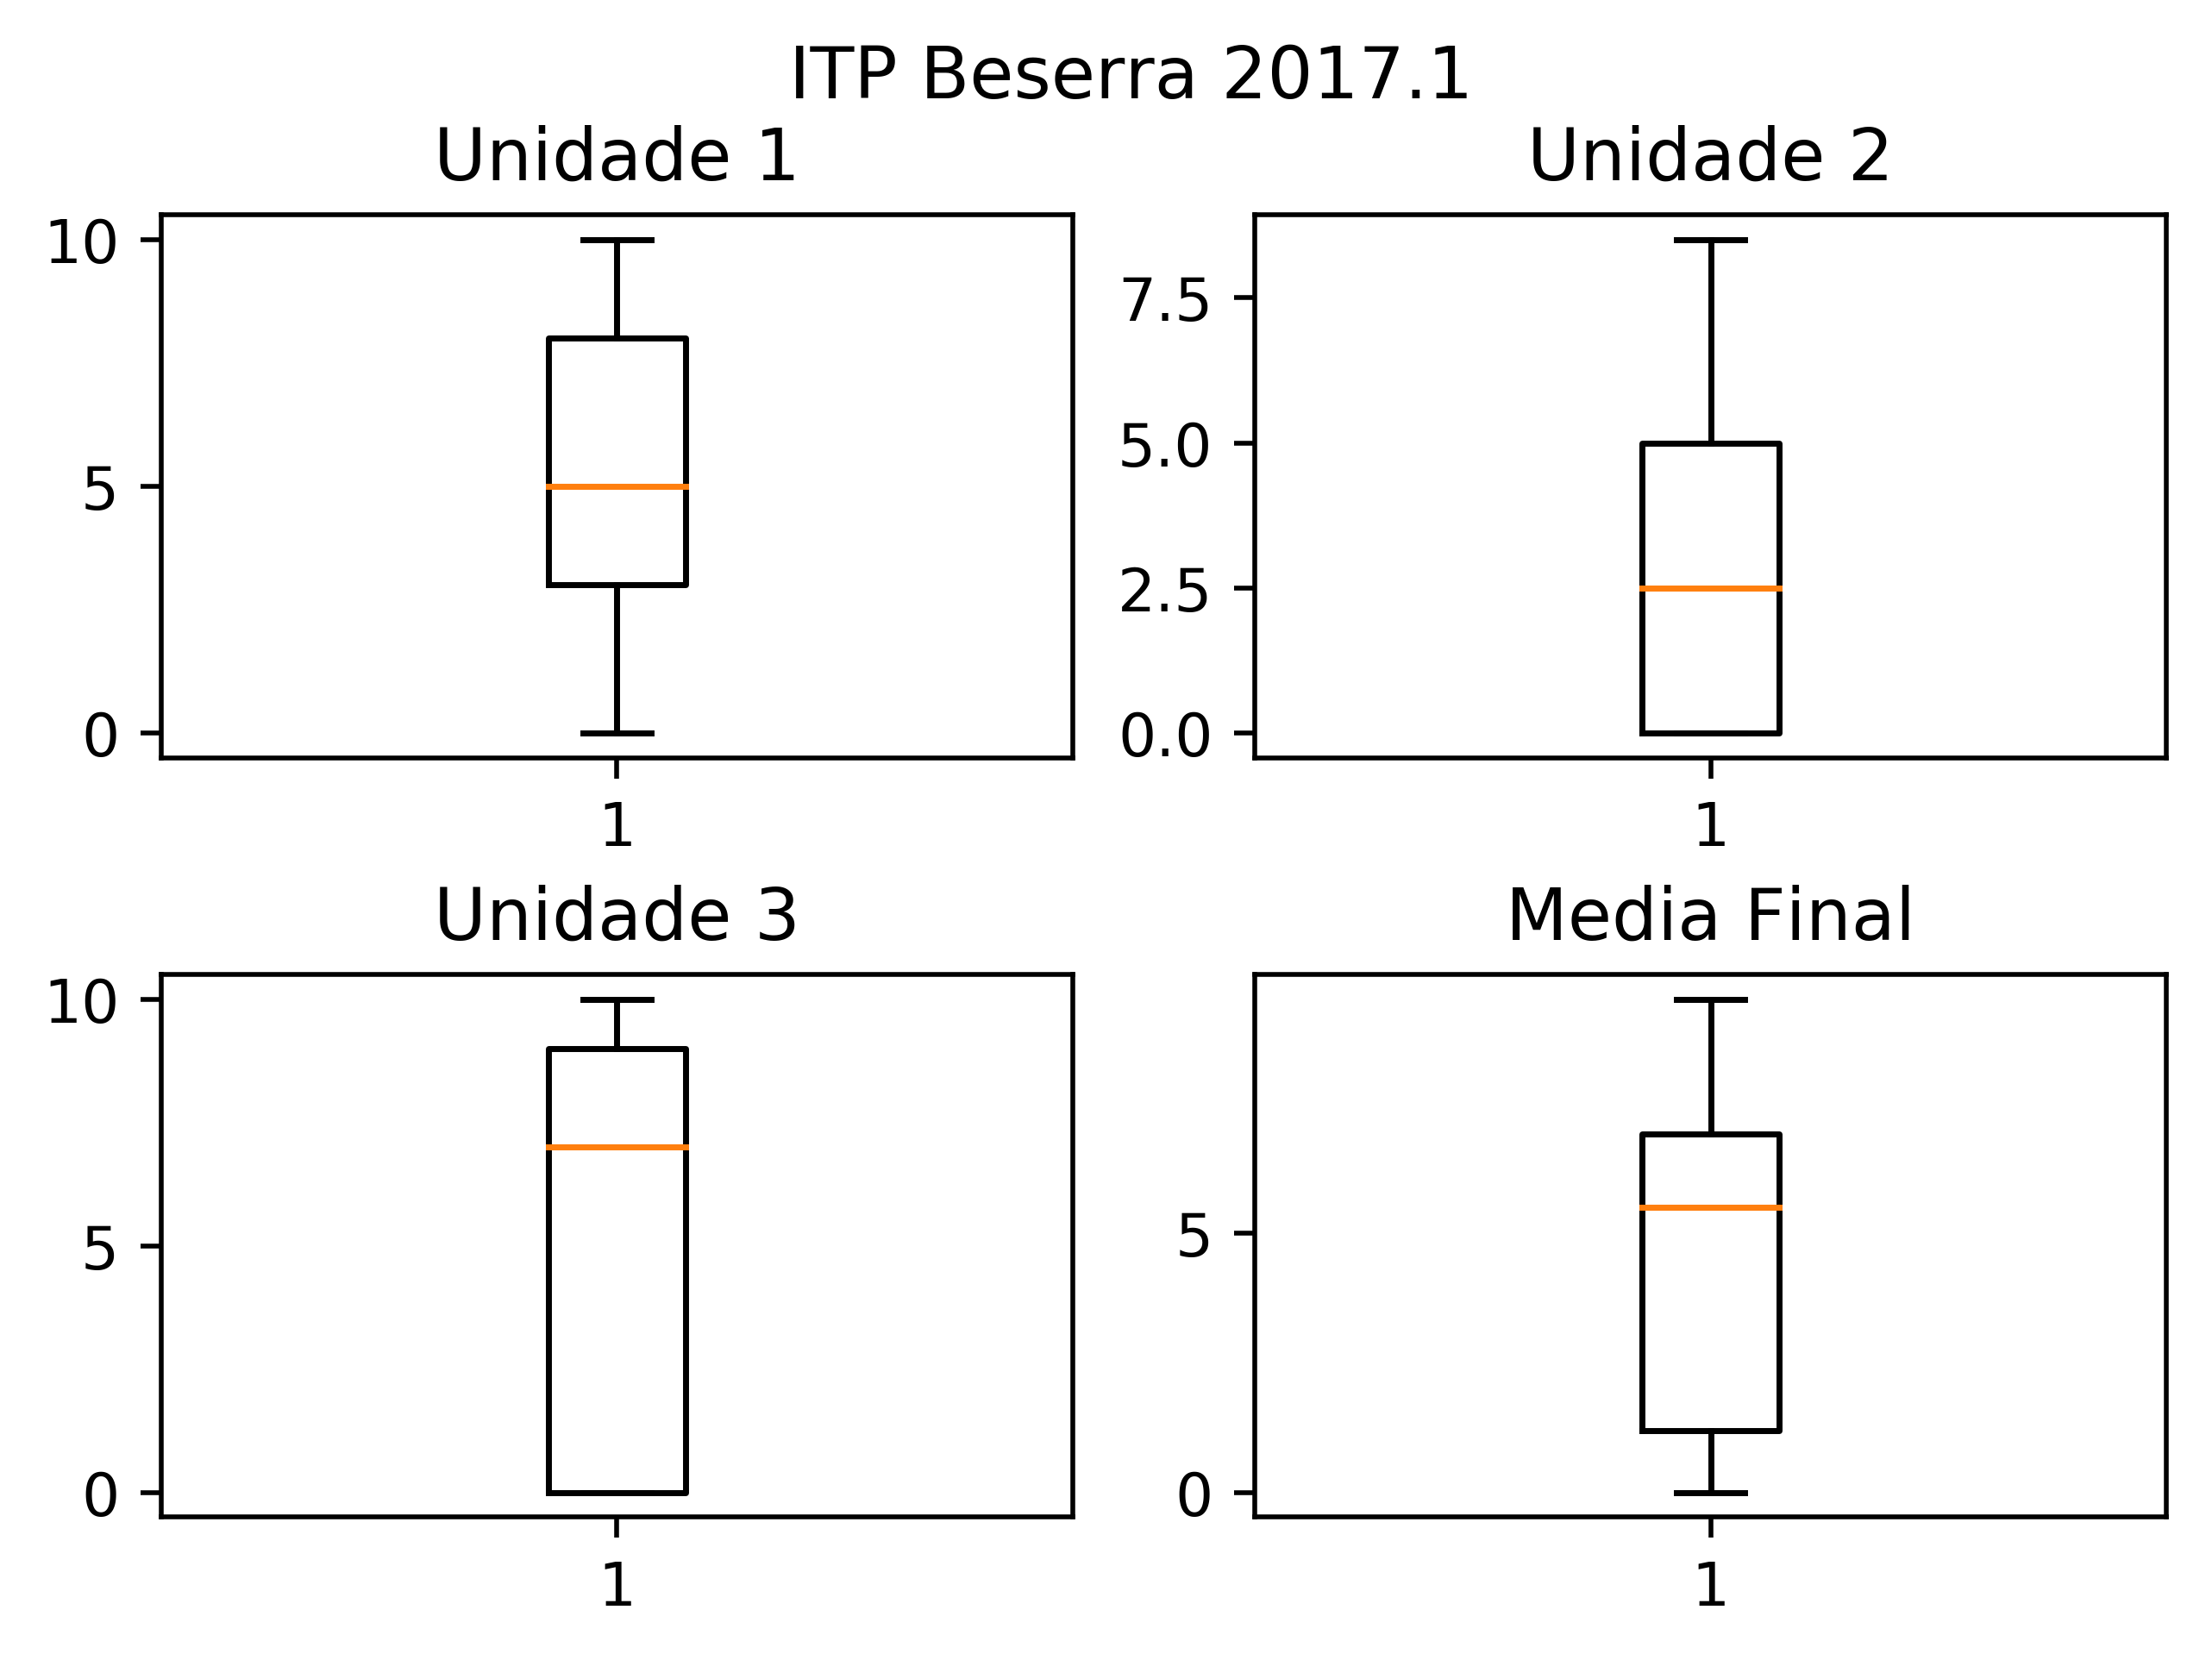

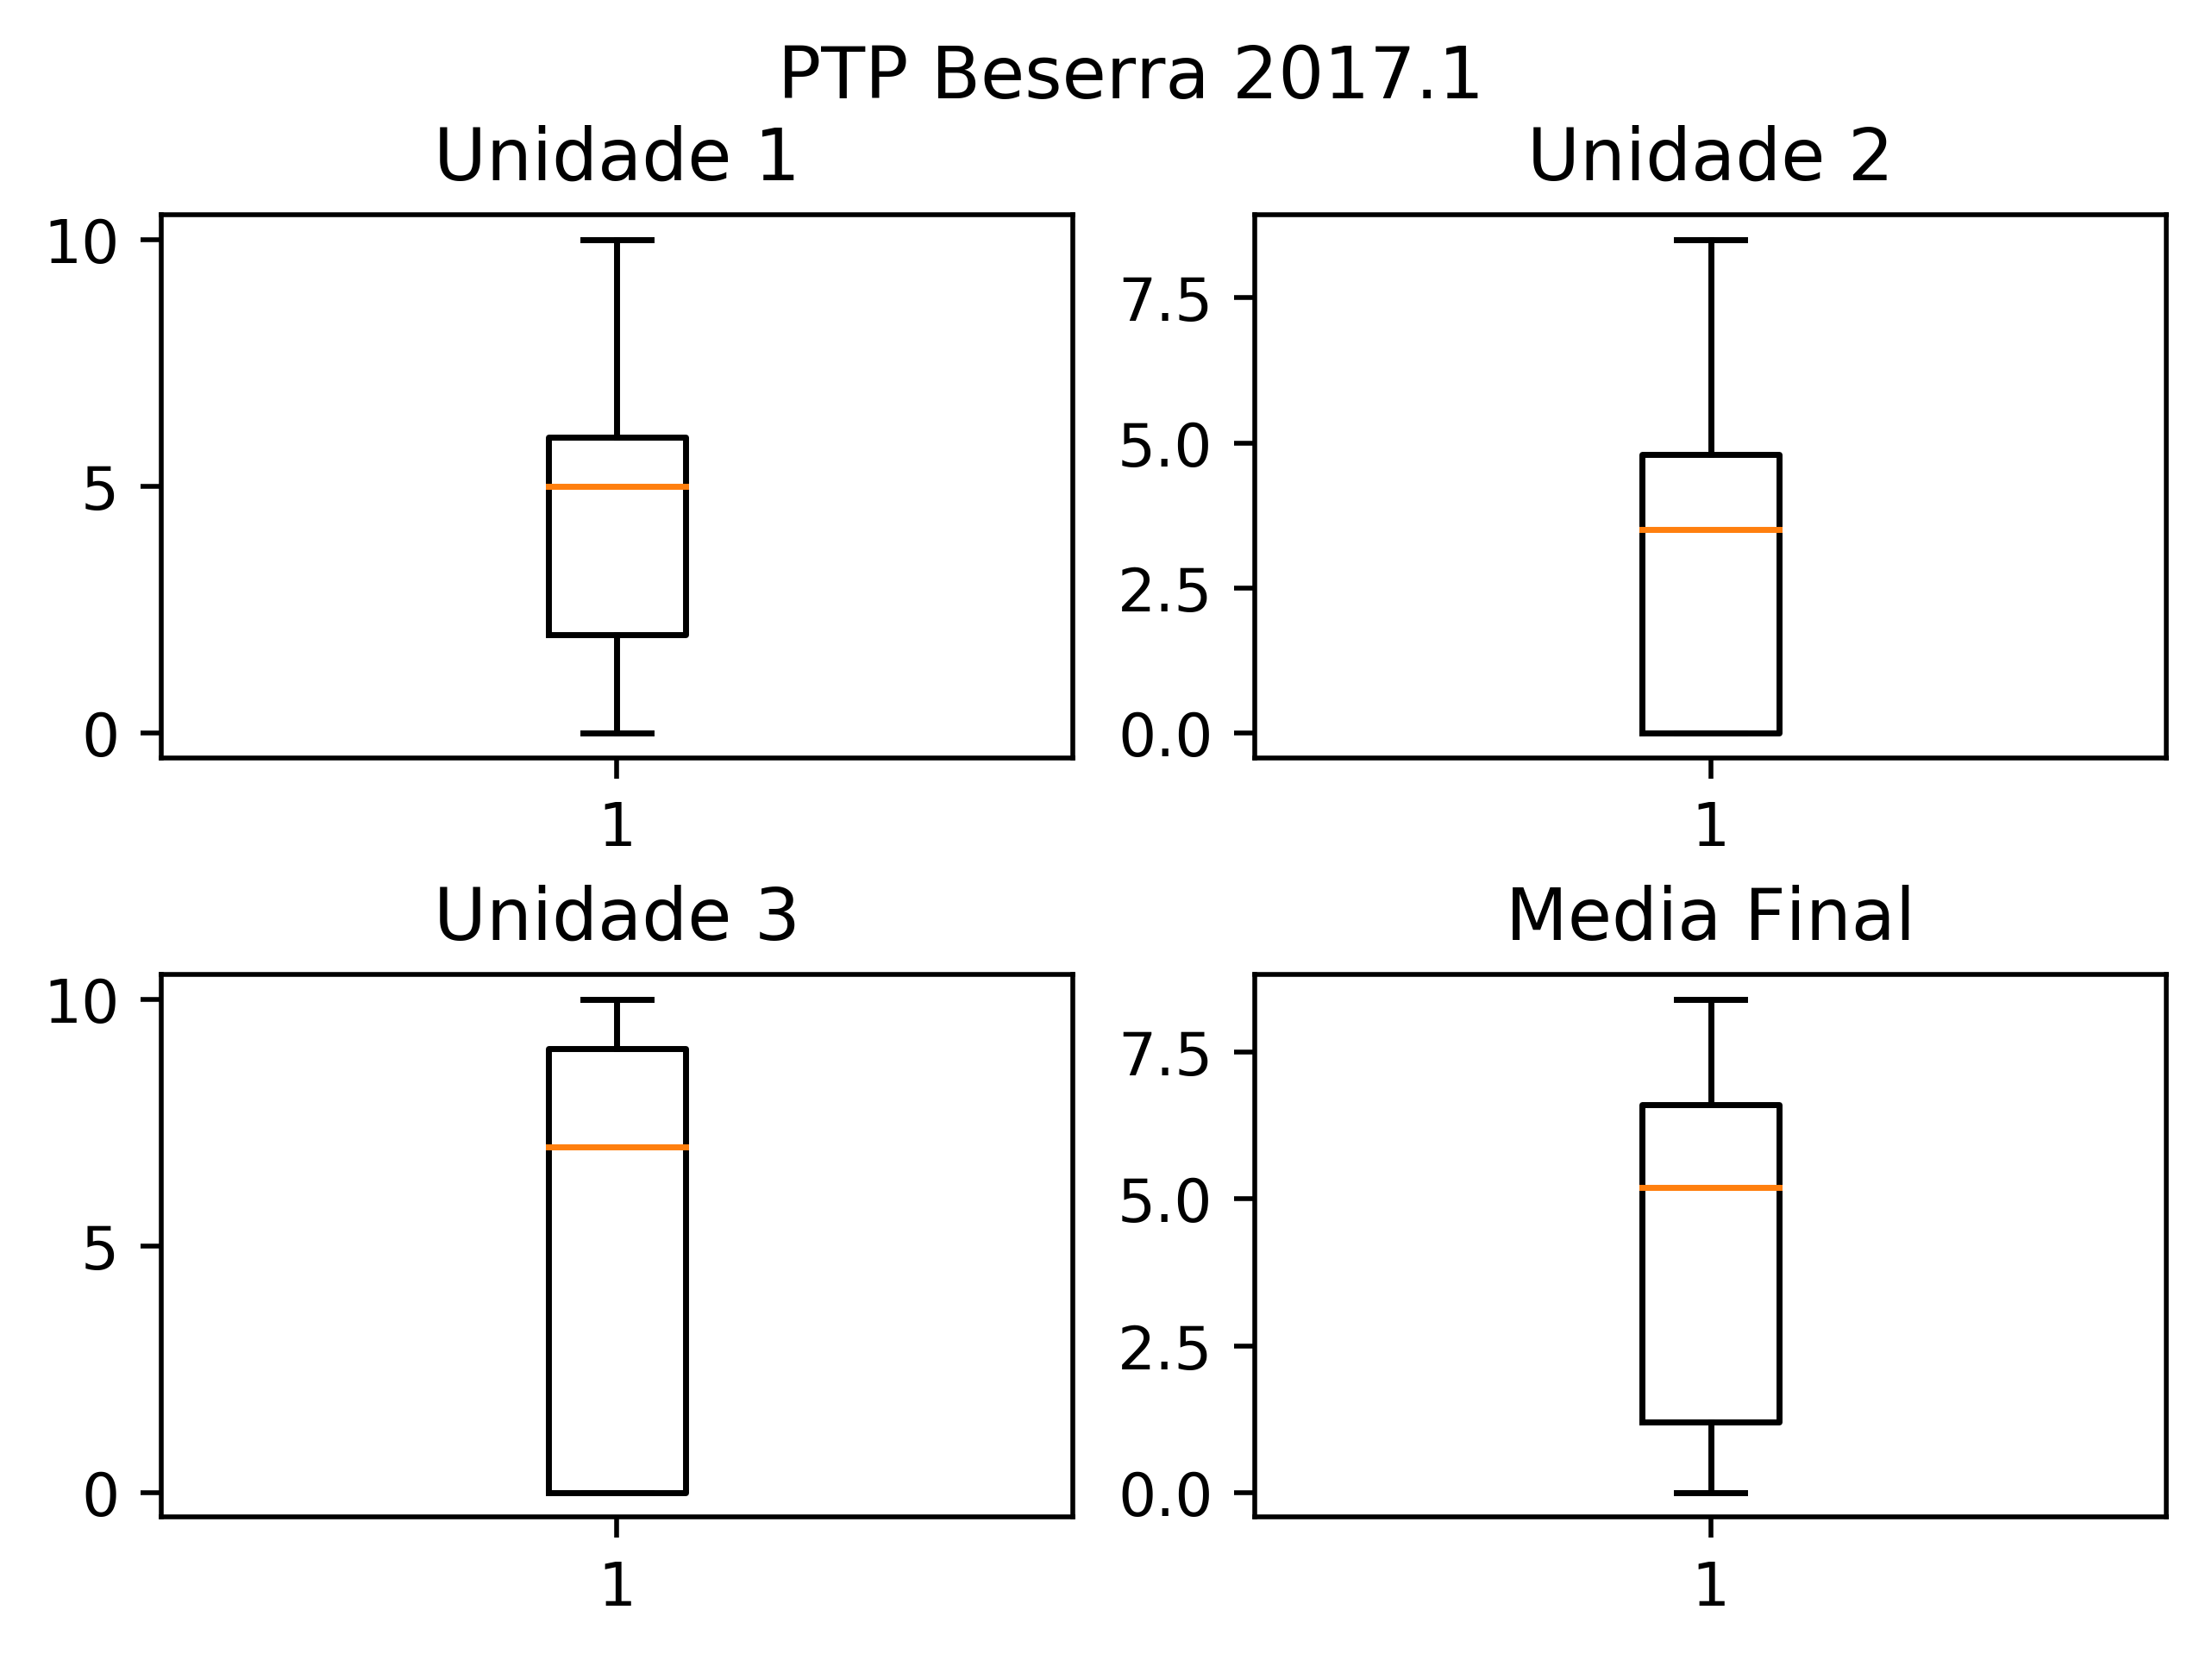

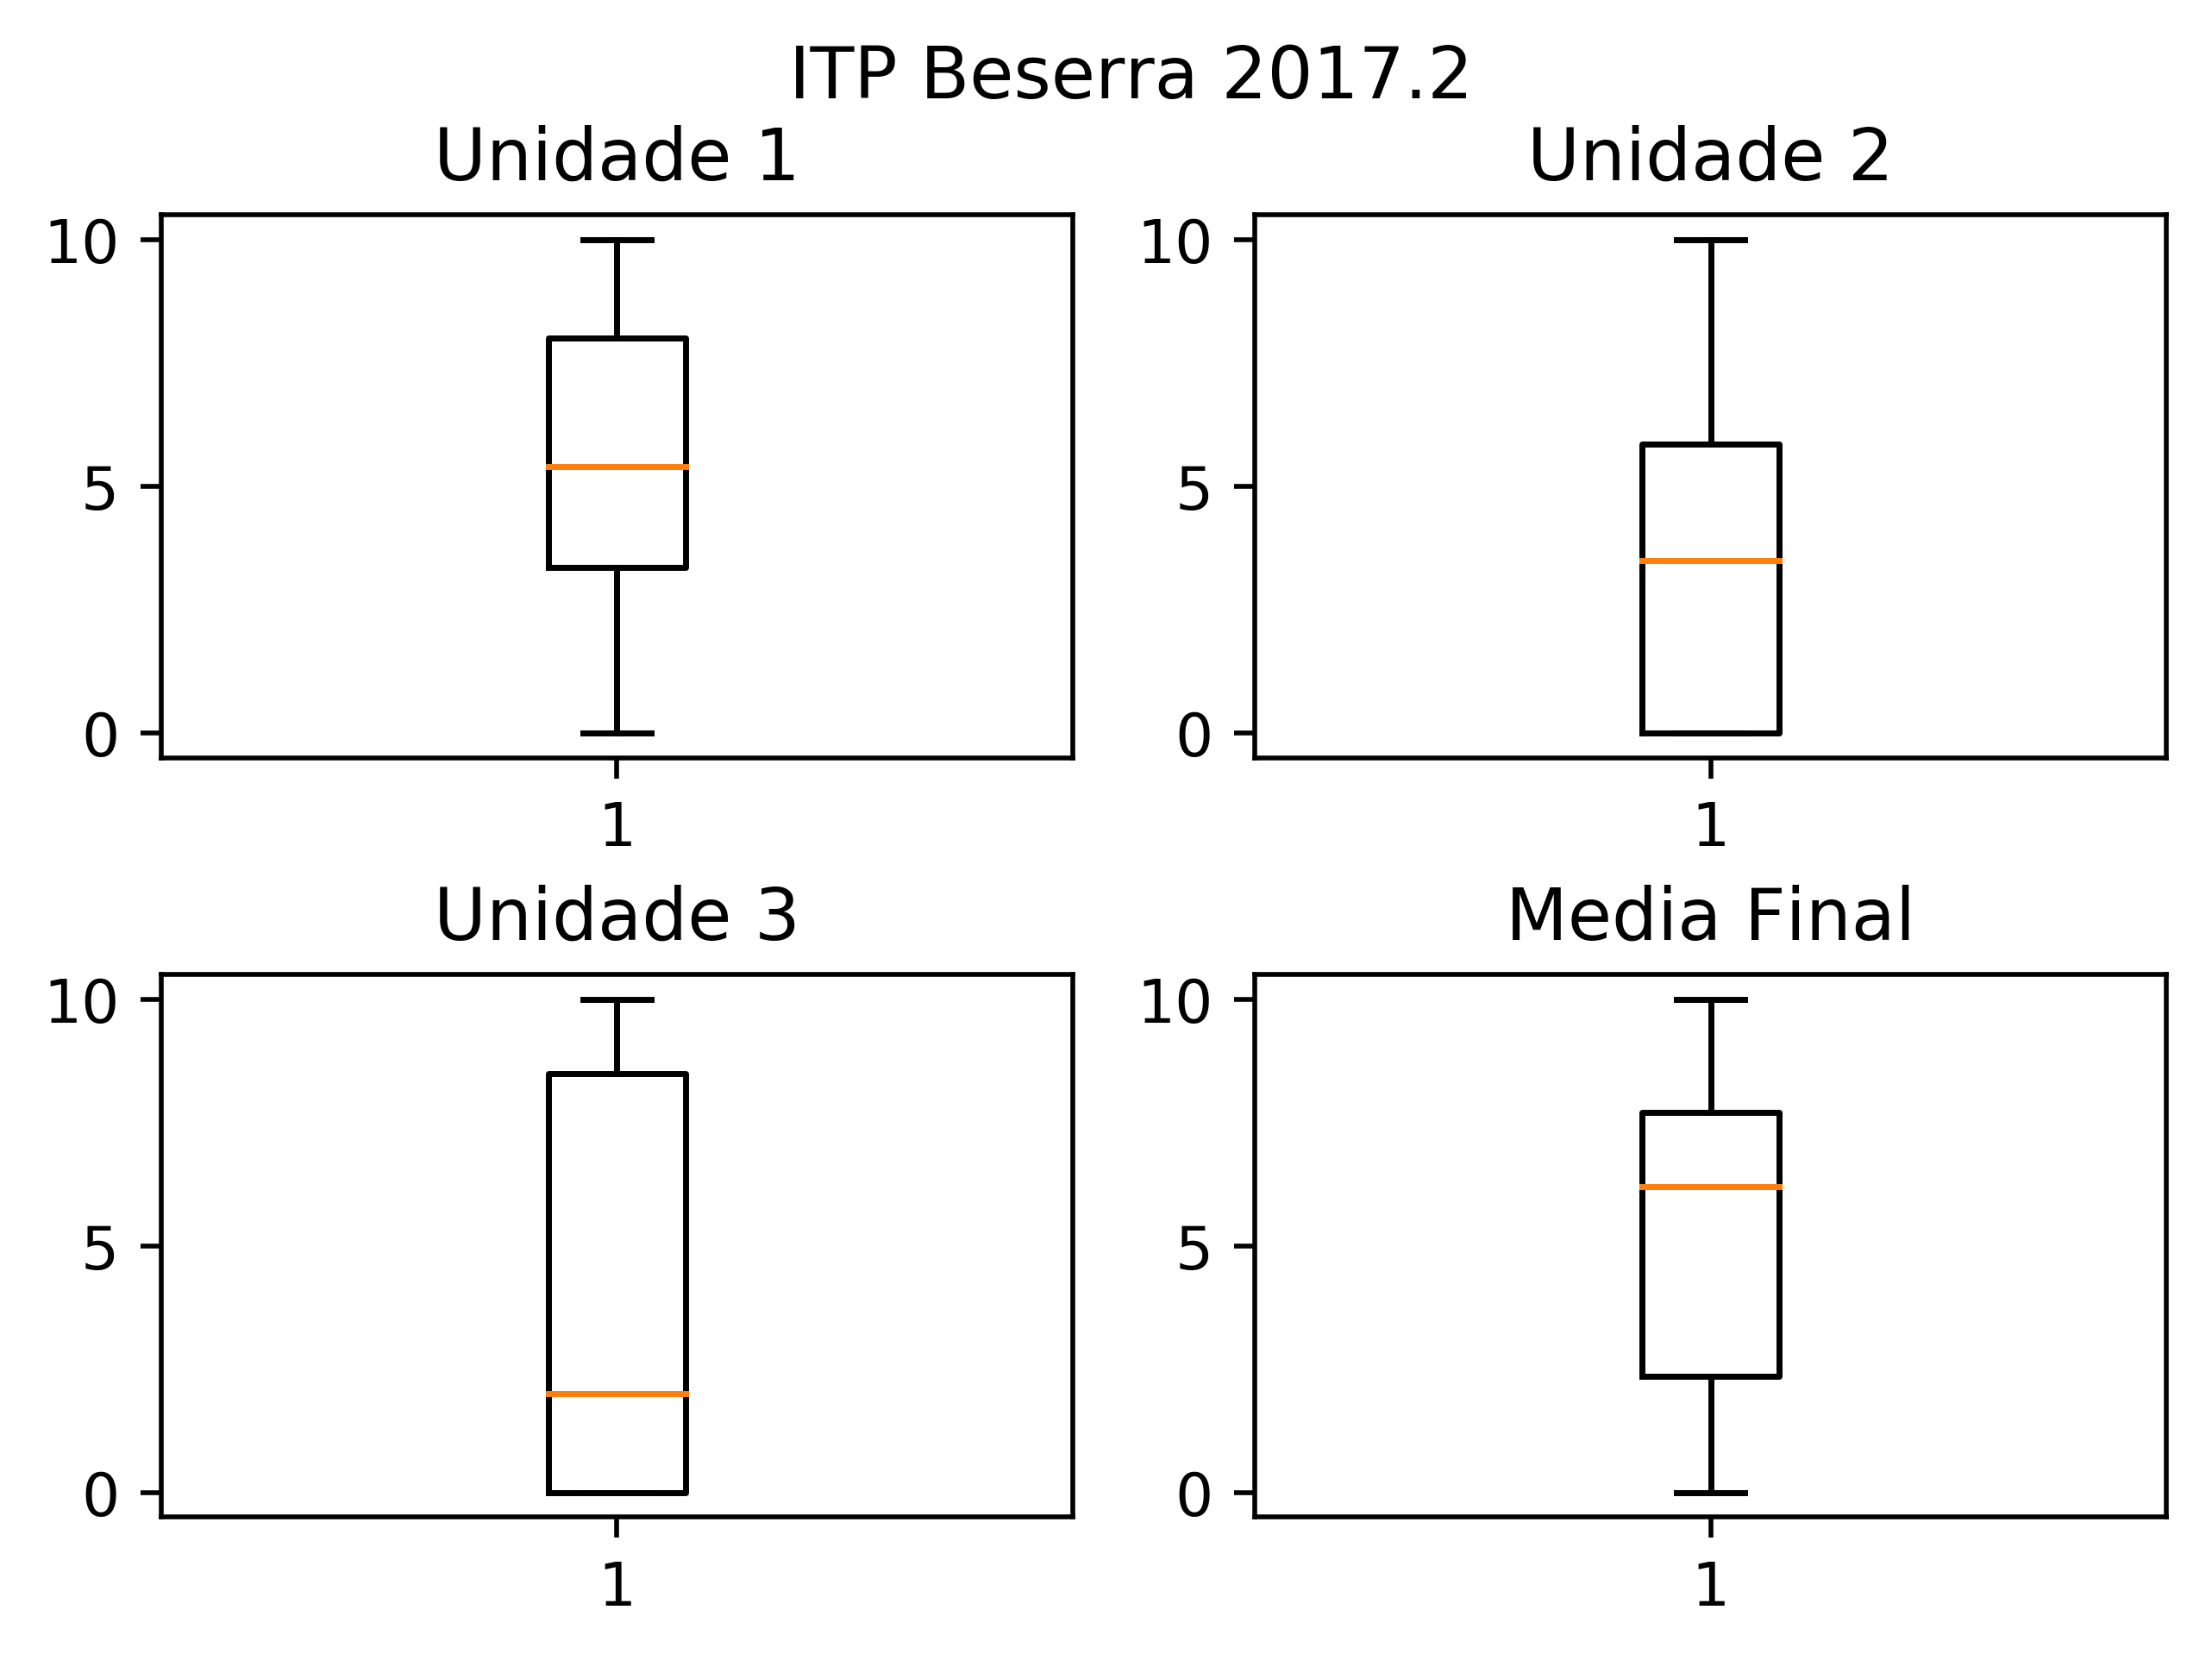

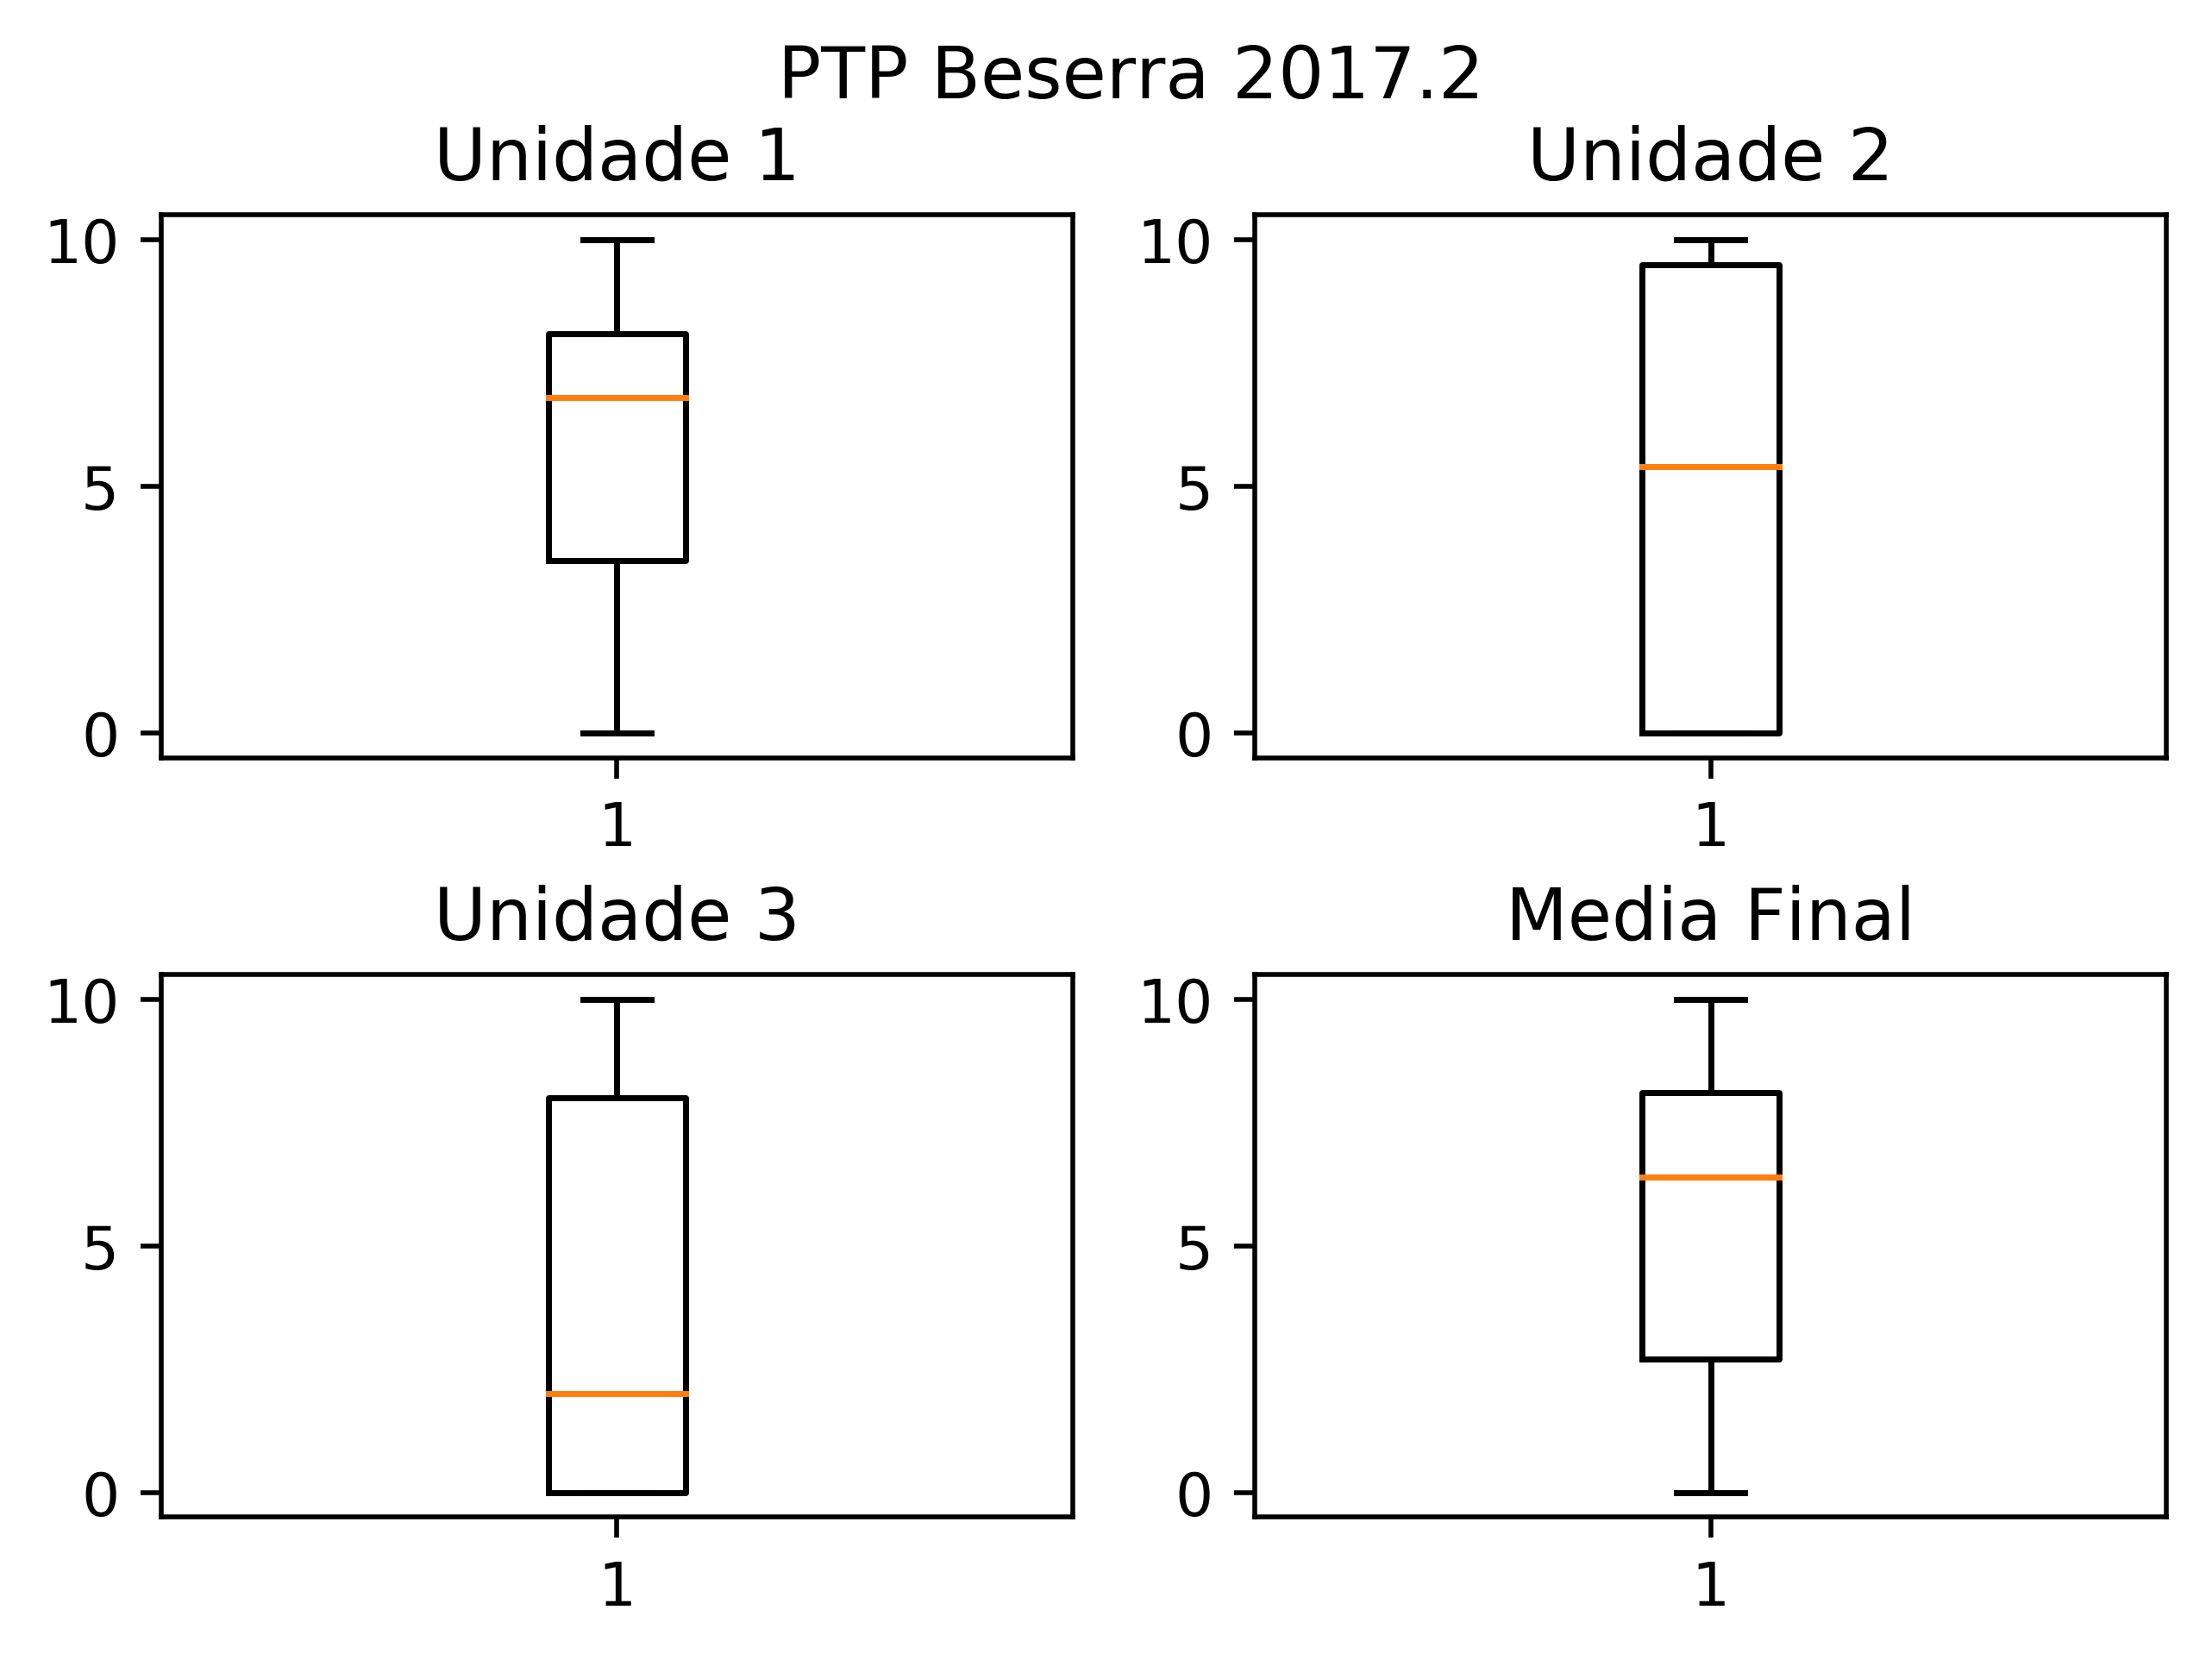

In [11]:
mediasBeserra = []
for i in range(len(nomeTurmasBeserra)):
    mediasBeserra.append(saveBoxPlot(nomeTurmasBeserra[i], unidadesBeserra[i]))

In [12]:
def visualizarMedias(medias, nomes):
    unidade1 = []
    unidade2 = []
    unidade3 = []
    final = []

    for i in range(len(medias)):
        print("As medias da turma " + nomes[i] + " são:")
        for j in range(len(medias[i])):
            medias[i][j] = round(medias[i][j], 1)

        unidade1.append(medias[i][0])
        unidade2.append(medias[i][1])
        unidade3.append(medias[i][2])
        final.append(medias[i][3])

        print("Unidade 1:   " + str(medias[i][0]))
        print("Unidade 2:   " + str(medias[i][1]))
        print("Unidade 3:   " + str(medias[i][2]))
        print("Media Final: " + str(medias[i][3]))
        print()

    print("A media na primeira unidade é: " + str(round(np.mean(unidade1), 1)))
    print("A media na segunda unidade é: " + str(round(np.mean(unidade2), 1)))
    print("A media na terceira unidade é: " + str(round(np.mean(unidade3), 1)))
    print("A media na nota final é: " + str(round(np.mean(final), 1)))
    return

In [13]:
visualizarMedias(mediasSolino, nomeTurmasSolino)

As medias da turma ITP Solino 2016.1 são:
Unidade 1:   5.2
Unidade 2:   4.2
Unidade 3:   3.1
Media Final: 4.3

As medias da turma PTP 1 Solino 2016.2 são:
Unidade 1:   4.4
Unidade 2:   3.1
Unidade 3:   4.3
Media Final: 4.0

As medias da turma ITP Solino 2017.2 são:
Unidade 1:   6.3
Unidade 2:   4.0
Unidade 3:   6.9
Media Final: 5.8

As medias da turma PTP 2 Solino 2016.2 são:
Unidade 1:   6.0
Unidade 2:   6.8
Unidade 3:   7.7
Media Final: 6.8

As medias da turma PTP Solino 2017.2 são:
Unidade 1:   6.4
Unidade 2:   4.0
Unidade 3:   6.9
Media Final: 5.8

A media na primeira unidade é: 5.7
A media na segunda unidade é: 4.4
A media na terceira unidade é: 5.8
A media na nota final é: 5.3


In [14]:
visualizarMedias(mediasBeserra, nomeTurmasBeserra)

As medias da turma ITP Beserra 2017.1 são:
Unidade 1:   5.0
Unidade 2:   2.8
Unidade 3:   4.7
Media Final: 4.6

As medias da turma PTP Beserra 2017.1 são:
Unidade 1:   4.5
Unidade 2:   2.9
Unidade 3:   4.7
Media Final: 4.2

As medias da turma ITP Beserra 2017.2 são:
Unidade 1:   5.3
Unidade 2:   4.0
Unidade 3:   4.1
Media Final: 5.0

As medias da turma PTP Beserra 2017.2 são:
Unidade 1:   5.7
Unidade 2:   5.4
Unidade 3:   4.4
Media Final: 5.5

A media na primeira unidade é: 5.1
A media na segunda unidade é: 3.8
A media na terceira unidade é: 4.5
A media na nota final é: 4.8
